In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset
df = pd.read_csv("sonardataset.csv")

In [5]:
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [7]:
df.isnull().sum()

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

In [8]:
# Separate features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
# Encode labels M/R to 1/0
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [10]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Build model function
def build_model(optimizer='adam', activation='relu', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=60, activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# Train baseline model
baseline_model = build_model()
baseline_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

In [14]:
# Predict baseline
y_pred = (baseline_model.predict(X_test) > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [15]:
# Baseline evaluation
print("Baseline Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Model Results:
Accuracy: 0.8809523809523809
Precision: 0.7894736842105263
Recall: 0.9375
F1 Score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.79      0.94      0.86        16

    accuracy                           0.88        42
   macro avg       0.87      0.89      0.88        42
weighted avg       0.89      0.88      0.88        42



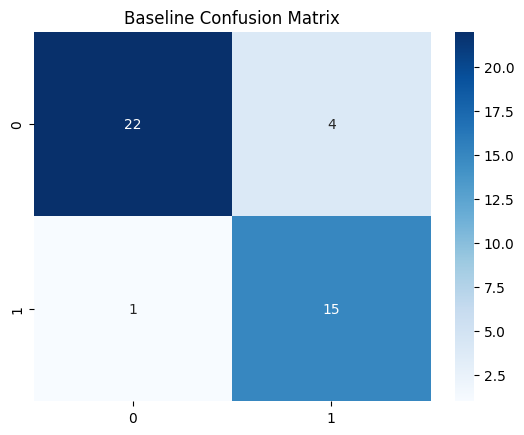

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Confusion Matrix")
plt.show()

In [17]:
from scikeras.wrappers import KerasClassifier
# Hyperparameter tuning setup
model_cv = KerasClassifier(model=build_model, verbose=0)
param_grid = {
    "model__neurons": [16, 32, 64],
    "model__activation": ["relu", "tanh"],
    "optimizer": ["adam", Adam(learning_rate=0.01)],
    "batch_size": [8, 16],
    "epochs": [50, 100]
}

# Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=model_cv,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
print("Starting grid search (this may take several minutes)")
grid_result = grid_search.fit(X_train, y_train)
print("Grid search completed!")

Starting grid search (this may take several minutes)
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Grid search completed!


In [18]:
print("Best Params:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

Best Params: {'batch_size': 8, 'epochs': 100, 'model__activation': 'relu', 'model__neurons': 32, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x000002302B927B10>}
Best Score: 0.8376623376623377


In [19]:
# Evaluate tuned model
best_model = grid_result.best_estimator_
y_pred_tuned = (best_model.predict(X_test) > 0.5).astype(int)

In [20]:
print("Tuned Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Tuned Model Results:
Accuracy: 0.9047619047619048
Precision: 0.8
Recall: 1.0
F1 Score: 0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.80      1.00      0.89        16

    accuracy                           0.90        42
   macro avg       0.90      0.92      0.90        42
weighted avg       0.92      0.90      0.91        42



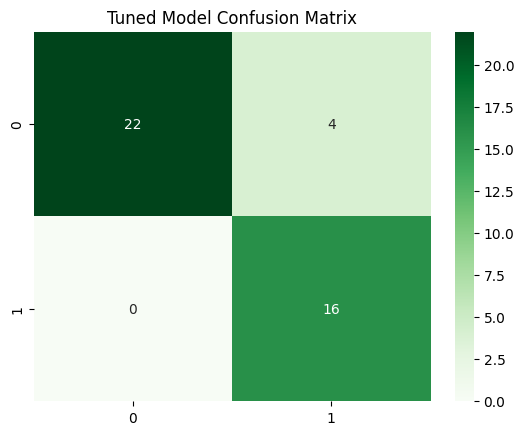

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Model Confusion Matrix")
plt.show()